In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [38]:
df = pd.read_csv('Carbon Emission.csv')
df

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [40]:
df.replace(np.nan, 'None', inplace=True)

In [41]:
#check duplicated

df[df.duplicated()]

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission


In [42]:
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for i in categorical_columns:
    df[i] = label_encoder.fit_transform(df[i])

In [43]:
X = df.drop(columns='CarbonEmission')
y = df['CarbonEmission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71)

In [44]:
#build a rough model to estimate feature importances

clf = RandomForestRegressor(n_estimators=500, max_depth=15, n_jobs=-1, random_state=71)
clf.fit(X_train, y_train)
train_r2 = r2_score(clf.predict(X_train), y_train)
test_r2 = r2_score(clf.predict(X_test), y_test)
print(train_r2, test_r2)

0.9855274869313279 0.8948816456231993


<BarContainer object of 19 artists>

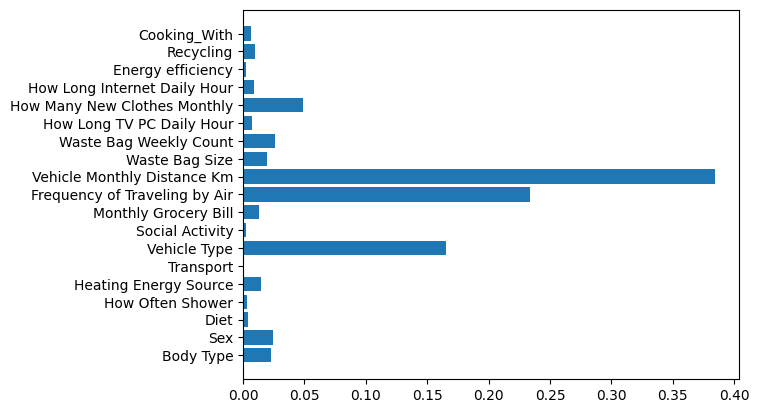

In [45]:
plt.barh(X.columns, clf.feature_importances_)

In [46]:
#rank features by importances

df_features = pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})
df_features.sort_values(by='importance', inplace=True)
df_features

,feature,importance
5,Transport,0.001020
16,Energy efficiency,0.002530
7,Social Activity,0.002839
3,How Often Shower,0.002990
2,Diet,0.004483
18,Cooking_With,0.006629
13,How Long TV PC Daily Hour,0.007286
15,How Long Internet Daily Hour,0.009277
17,Recycling,0.010160
8,Monthly Grocery Bill,0.012877


In [53]:
#variance: features_dropped, criterion
#n_estimators, max_depth altered for observation purpose

features_list = df_features['feature'].to_list()
clf_list = list()

for i in range(200, 2100, 500):
    for j in range(10, 34, 6):
        for k in ['squared_error', 'friedman_mse', 'poisson']:
            X_drop_train = X_train.copy()
            X_drop_test = X_test.copy()
            features_dropped = 0
            for l in features_list[:-1]:
                clf = RandomForestRegressor(n_estimators=i, max_depth=j, criterion=k, n_jobs=-1, random_state=71)
                clf.fit(X_drop_train, y_train)
                train_r2 = r2_score(clf.predict(X_drop_train), y_train)
                test_r2 = r2_score(clf.predict(X_drop_test), y_test)
                print(i, j, k, features_dropped, train_r2, test_r2)
                clf_list.append({'n_estimators':i, 'max_depth':j, 'criterion':k, 'features_dropped':features_dropped, 'train_r2':train_r2, 'test_r2':test_r2})
                X_drop_train.drop(columns=l, inplace=True)
                X_drop_test.drop(columns=l, inplace=True)
                features_dropped+=1

clf_df = pd.DataFrame(clf_list)
clf_df

200 10 squared_error 0 0.9511211174424699 0.8758592251007096
200 10 squared_error 1 0.9511447651201805 0.8756924479941101
200 10 squared_error 2 0.9511302414042572 0.8763396863692752
200 10 squared_error 3 0.9510320121583997 0.8762703187772021
200 10 squared_error 4 0.9510331266834425 0.8771087075911171
200 10 squared_error 5 0.9506915980518582 0.8767278002968016
200 10 squared_error 6 0.9507322067108086 0.878443043705428
200 10 squared_error 7 0.9509231699323315 0.8800241339732205
200 10 squared_error 8 0.9505155206321517 0.8805429465577859
200 10 squared_error 9 0.9494814534021507 0.88123732758722
200 10 squared_error 10 0.9488106546051382 0.8844600920872157
200 10 squared_error 11 0.9402488804304144 0.8734868324982332
200 10 squared_error 12 0.9254238093853852 0.852892182055401
200 10 squared_error 13 0.9048862498642921 0.8073443642455522
200 10 squared_error 14 0.8824566923257833 0.7742297138510518
200 10 squared_error 15 0.853472988646381 0.736927929955149
200 10 squared_error 16 

,n_estimators,max_depth,criterion,features_dropped,train_r2,test_r2
0,200,10,squared_error,0,0.951121,0.875859
1,200,10,squared_error,1,0.951145,0.875692
2,200,10,squared_error,2,0.951130,0.876340
3,200,10,squared_error,3,0.951032,0.876270
4,200,10,squared_error,4,0.951033,0.877109
...,...,...,...,...,...,...
859,1700,28,poisson,13,0.975999,0.794693
860,1700,28,poisson,14,0.970661,0.760566
861,1700,28,poisson,15,0.962367,0.716570
862,1700,28,poisson,16,0.887971,0.620600


In [68]:
def df_filter(dataframe, n_estimators, max_depth, test_r2):
    return dataframe[dataframe['n_estimators']==n_estimators][dataframe['max_depth']==max_depth][dataframe['test_r2']>test_r2]

C:\Users\someo\AppData\Local\Temp\ipykernel_9496\2223080197.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return dataframe[dataframe['n_estimators']==n_estimators][dataframe['max_depth']==max_depth][dataframe['test_r2']>test_r2]
C:\Users\someo\AppData\Local\Temp\ipykernel_9496\2223080197.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return dataframe[dataframe['n_estimators']==n_estimators][dataframe['max_depth']==max_depth][dataframe['test_r2']>test_r2]
C:\Users\someo\AppData\Local\Temp\ipykernel_9496\2223080197.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return dataframe[dataframe['n_estimators']==n_estimators][dataframe['max_depth']==max_depth][dataframe['test_r2']>test_r2]
C:\Users\someo\AppData\Local\Temp\ipykernel_9496\2223080197.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return dataframe[dataframe['n_estimators']==n_estimator

[Text(0.5, 1.0, 'n_estimators=1700, max_depth=28')]

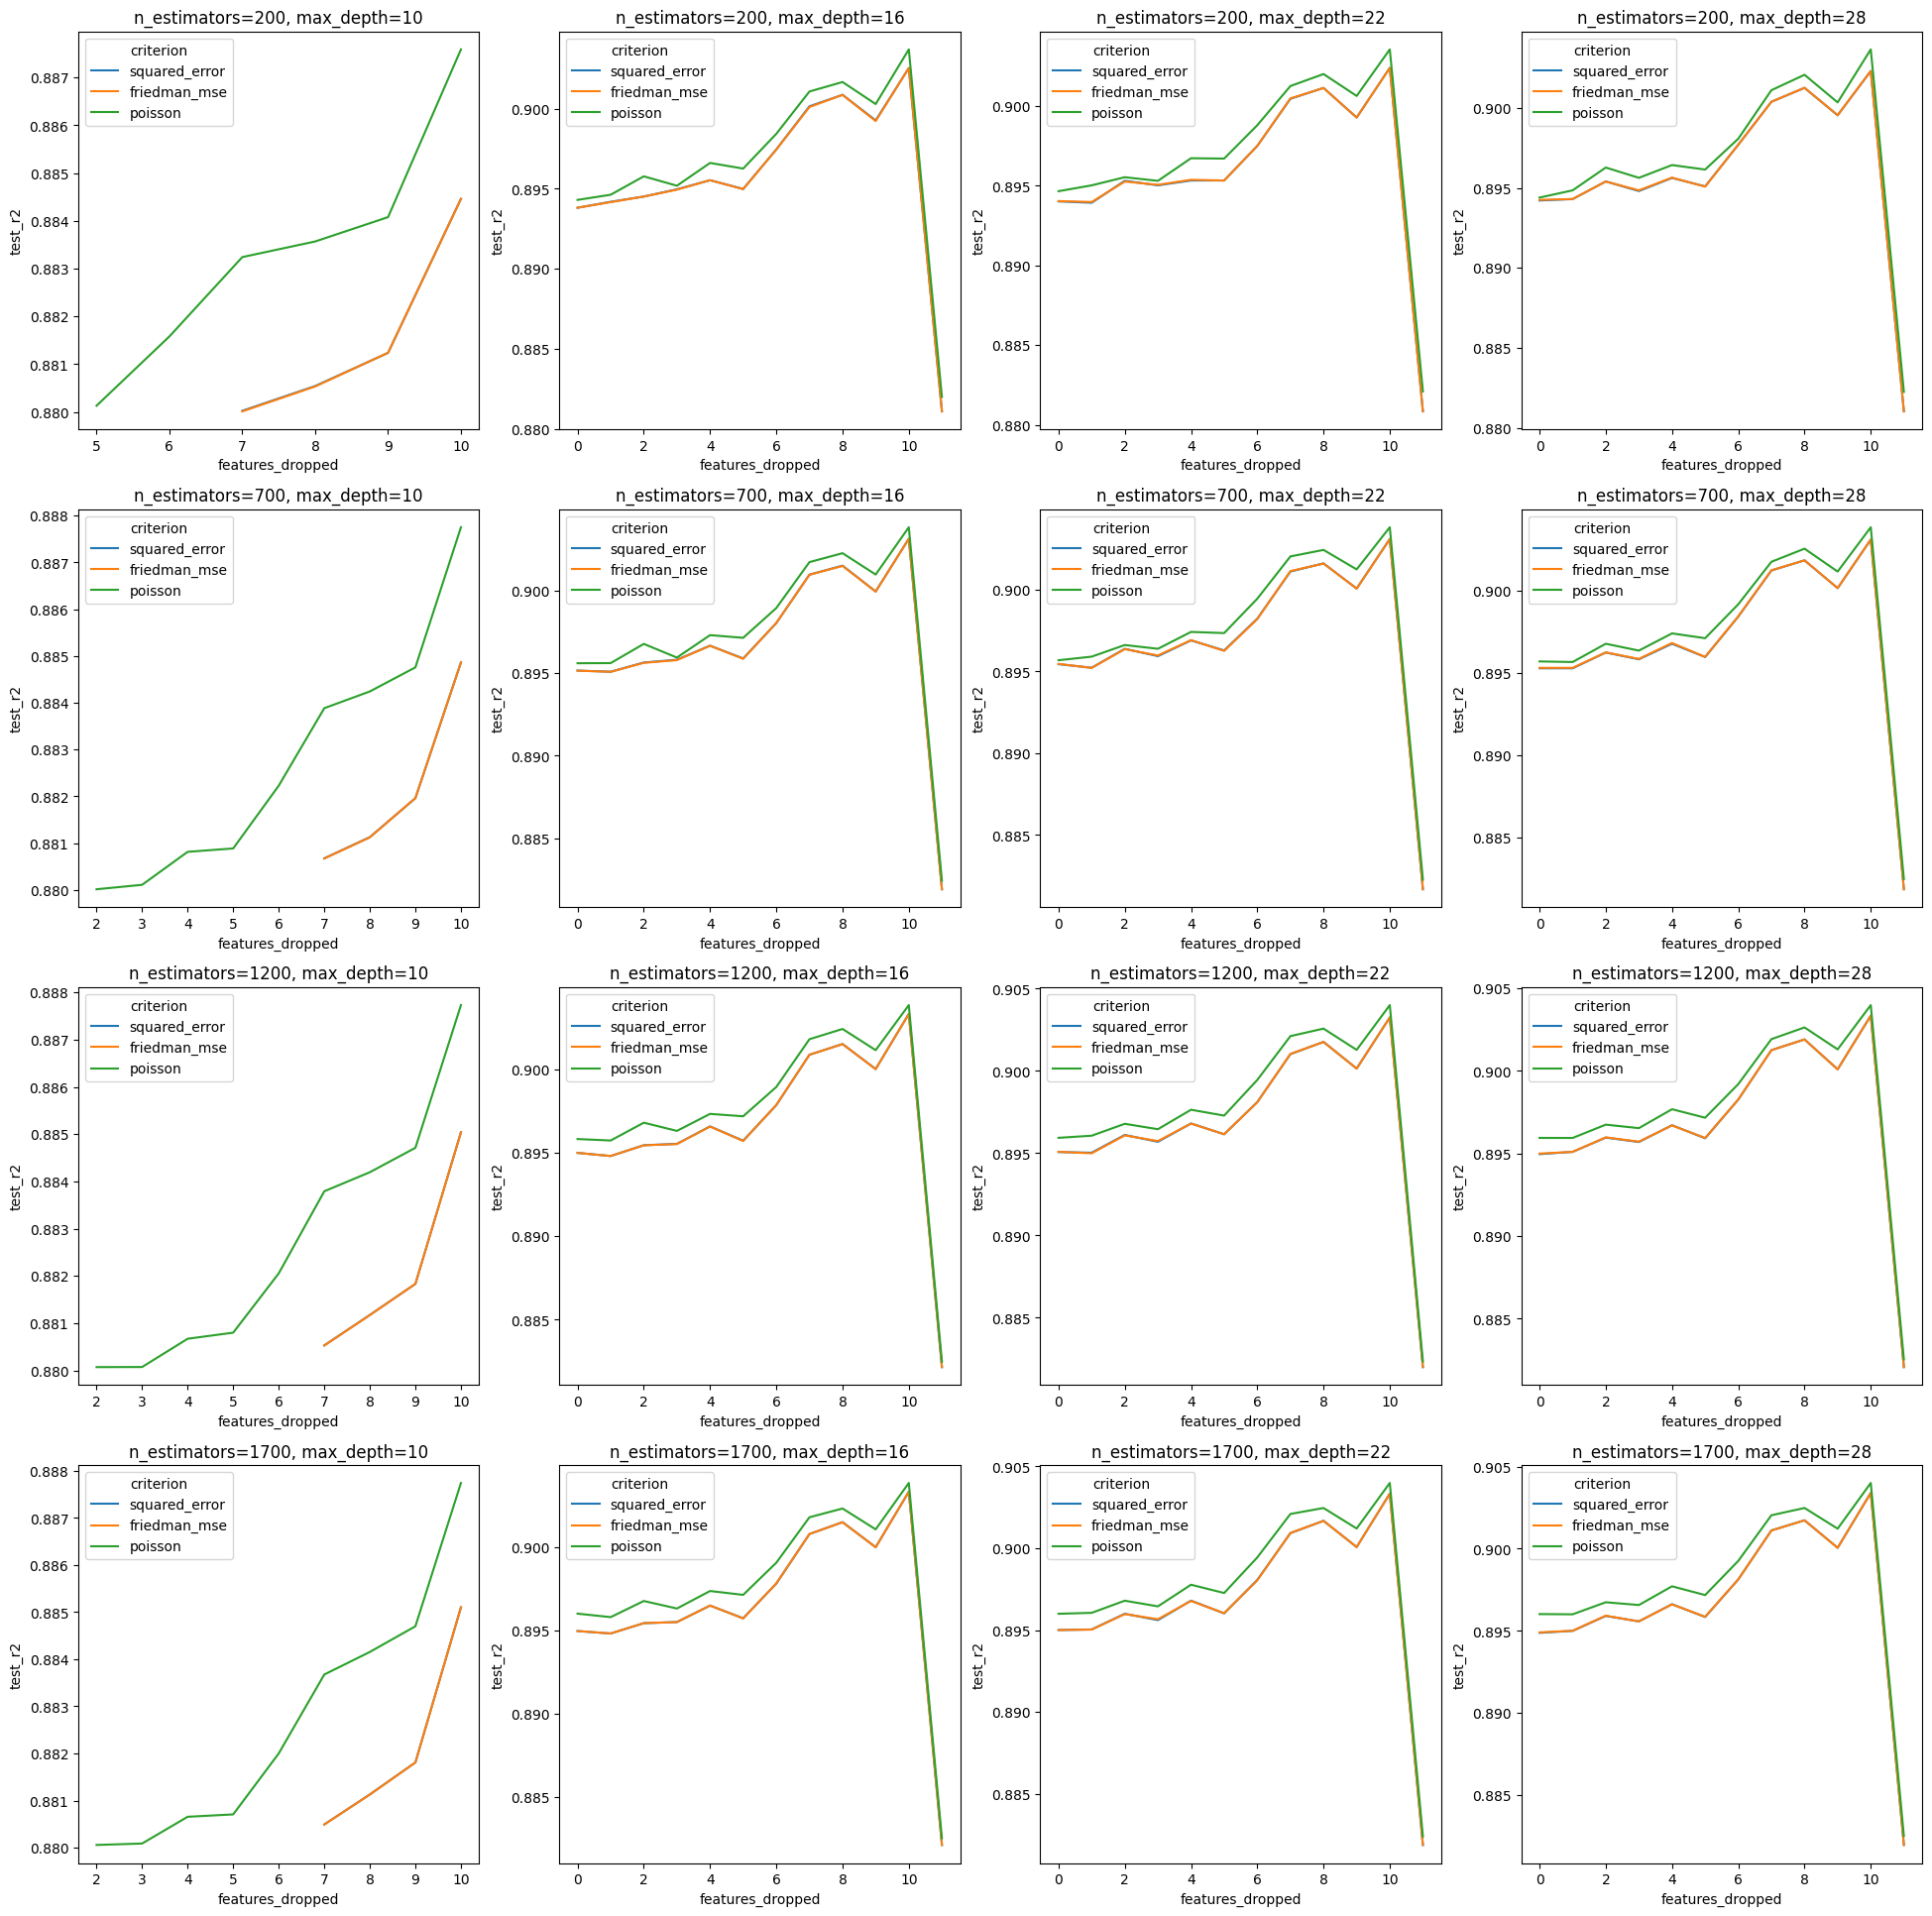

In [91]:
#plot features_dropped/test_r2 with test_r2>0.88 filter
#squared_error and friedman_mse criterion have very similar results, thus stacking together and showing only one line

plt.figure(figsize=(24, 24))

plt.subplot(4, 4, 1)
sns.lineplot(data=df_filter(clf_df, 200, 10, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=200, max_depth=10')

plt.subplot(4, 4, 2)
sns.lineplot(data=df_filter(clf_df, 200, 16, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=200, max_depth=16')

plt.subplot(4, 4, 3)
sns.lineplot(data=df_filter(clf_df, 200, 22, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=200, max_depth=22')

plt.subplot(4, 4, 4)
sns.lineplot(data=df_filter(clf_df, 200, 28, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=200, max_depth=28')

plt.subplot(4, 4, 5)
sns.lineplot(data=df_filter(clf_df, 700, 10, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=700, max_depth=10')

plt.subplot(4, 4, 6)
sns.lineplot(data=df_filter(clf_df, 700, 16, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=700, max_depth=16')

plt.subplot(4, 4, 7)
sns.lineplot(data=df_filter(clf_df, 700, 22, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=700, max_depth=22')

plt.subplot(4, 4, 8)
sns.lineplot(data=df_filter(clf_df, 700, 28, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=700, max_depth=28')

plt.subplot(4, 4, 9)
sns.lineplot(data=df_filter(clf_df, 1200, 10, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=1200, max_depth=10')

plt.subplot(4, 4, 10)
sns.lineplot(data=df_filter(clf_df, 1200, 16, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=1200, max_depth=16')

plt.subplot(4, 4, 11)
sns.lineplot(data=df_filter(clf_df, 1200, 22, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=1200, max_depth=22')

plt.subplot(4, 4, 12)
sns.lineplot(data=df_filter(clf_df, 1200, 28, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=1200, max_depth=28')

plt.subplot(4, 4, 13)
sns.lineplot(data=df_filter(clf_df, 1700, 10, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=1700, max_depth=10')

plt.subplot(4, 4, 14)
sns.lineplot(data=df_filter(clf_df, 1700, 16, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=1700, max_depth=16')

plt.subplot(4, 4, 15)
sns.lineplot(data=df_filter(clf_df, 1700, 22, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=1700, max_depth=22')

plt.subplot(4, 4, 16)
sns.lineplot(data=df_filter(clf_df, 1700, 28, 0.88), x='features_dropped', y='test_r2', hue='criterion').set(title='n_estimators=1700, max_depth=28')

<Axes: xlabel='features_dropped', ylabel='test_r2'>

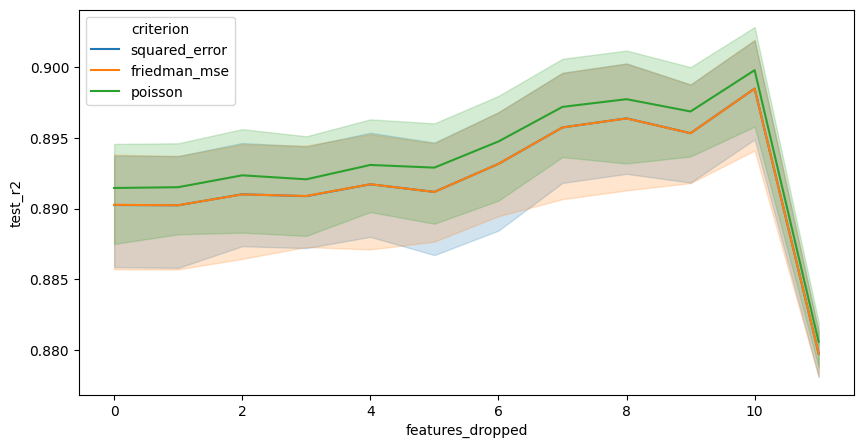

In [93]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=clf_df[clf_df['test_r2']>0.87], x='features_dropped', y='test_r2', hue='criterion')

In [89]:
clf_df.sort_values(by='test_r2', ascending=False)[:20]

,n_estimators,max_depth,criterion,features_dropped,train_r2,test_r2
856,1700,28,poisson,10,0.988206,0.904004
586,1200,22,poisson,10,0.988193,0.904001
640,1200,28,poisson,10,0.988191,0.903984
802,1700,22,poisson,10,0.988206,0.903983
424,700,28,poisson,10,0.988162,0.903860
316,700,16,poisson,10,0.987362,0.903834
532,1200,16,poisson,10,0.987371,0.903833
748,1700,16,poisson,10,0.987391,0.903832
370,700,22,poisson,10,0.988159,0.903809
100,200,16,poisson,10,0.987177,0.903697


In [ ]:
'''
features_dropped=10, criterion=poisson gives best results all across
'''

In [95]:
X_selected_train = X_train.drop(columns=features_list[:10])
X_selected_test = X_test.drop(columns=features_list[:10])

In [97]:
#variant: n_estimators, max_depth

clf_list = list()

for i in range(100, 2500, 100):
    for j in range(10, 35):
        clf = RandomForestRegressor(n_estimators=i, max_depth=j, criterion='poisson', n_jobs=-1, random_state=71)
        clf.fit(X_selected_train, y_train)
        train_r2 = r2_score(clf.predict(X_selected_train), y_train)
        test_r2 = r2_score(clf.predict(X_selected_test), y_test)
        print(i, j, train_r2, test_r2)
        clf_list.append({'n_estimators':i, 'max_depth':j, 'train_r2':train_r2, 'test_r2':test_r2})

clf_df = pd.DataFrame(clf_list)
clf_df

100 10 0.9504551355628718 0.886834506960876
100 11 0.9644226090457815 0.8946870538333016
100 12 0.973785985593763 0.8989766847234817
100 13 0.9798469292304448 0.9008049835287847
100 14 0.9836446672416679 0.9023703992247322
100 15 0.9856654938020312 0.9024096931087792
100 16 0.9867820475659786 0.9026036690886714
100 17 0.9873290959744591 0.9027419659563068
100 18 0.9875085612994841 0.9030751092083361
100 19 0.9876147253903431 0.9031466384652831
100 20 0.987628142608416 0.903034898152332
100 21 0.9876603827038113 0.9024720295805349
100 22 0.9876245118882818 0.902630556735803
100 23 0.9876314063498101 0.9026703281920081
100 24 0.9876454914537568 0.902715844514259
100 25 0.9876560174549509 0.9027483301116521
100 26 0.9876558061447352 0.9027462466483148
100 27 0.9876558061447352 0.9027462466483148
100 28 0.9876558061447352 0.9027462466483148
100 29 0.9876558061447352 0.9027462466483148
100 30 0.9876558061447352 0.9027462466483148
100 31 0.9876558061447352 0.9027462466483148
100 32 0.9876558

,n_estimators,max_depth,train_r2,test_r2
0,100,10,0.950455,0.886835
1,100,11,0.964423,0.894687
2,100,12,0.973786,0.898977
3,100,13,0.979847,0.900805
4,100,14,0.983645,0.902370
...,...,...,...,...
595,2400,30,0.988197,0.904042
596,2400,31,0.988197,0.904042
597,2400,32,0.988197,0.904042
598,2400,33,0.988197,0.904042


<Axes: xlabel='max_depth', ylabel='test_r2'>

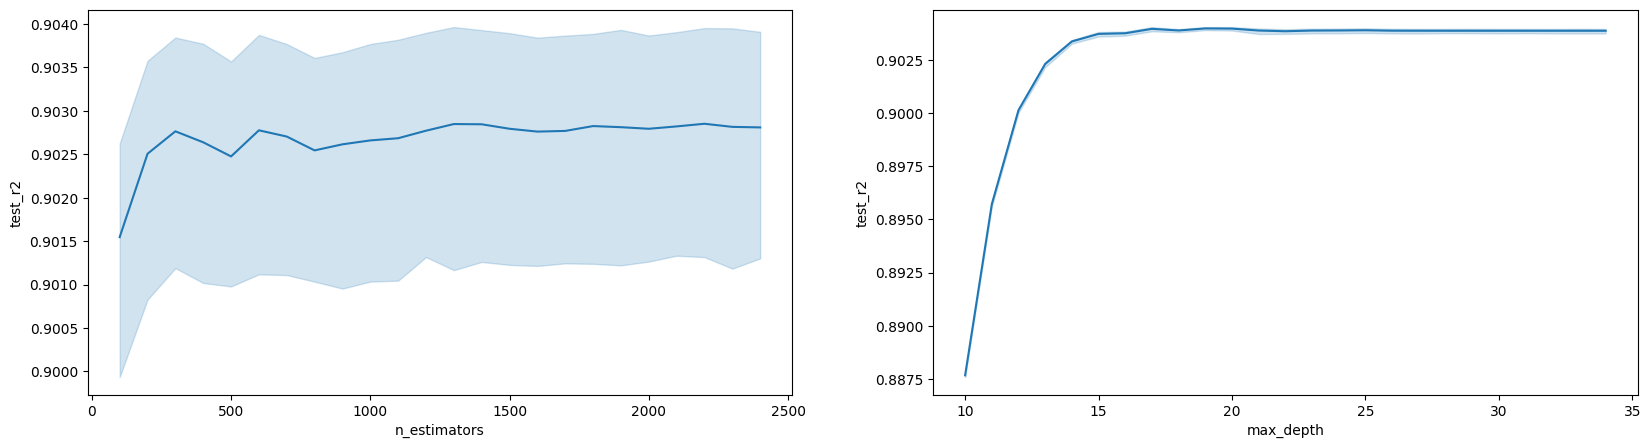

In [100]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=clf_df, x='n_estimators', y='test_r2')

plt.subplot(1, 2, 2)
sns.lineplot(data=clf_df, x='max_depth', y='test_r2')

In [101]:
clf_df.sort_values(by='test_r2', ascending=False)[:25]

,n_estimators,max_depth,train_r2,test_r2
60,300,20,0.988126,0.904230
134,600,19,0.988126,0.904137
309,1300,19,0.988163,0.904131
457,1900,17,0.987888,0.904128
432,1800,17,0.987890,0.904126
336,1400,21,0.988196,0.904119
507,2100,17,0.987885,0.904117
332,1400,17,0.987871,0.904116
532,2200,17,0.987881,0.904115
132,600,17,0.987853,0.904114


In [ ]:
'''
n_estimators=300, max_depth=20 gives best result
'''

In [103]:
#variant: min_samples_split

clf_list = list()

for i in range(2, 20):
    clf = RandomForestRegressor(n_estimators=300, max_depth=20, criterion='poisson', min_samples_split=i, n_jobs=-1, random_state=71)
    clf.fit(X_selected_train, y_train)
    train_r2 = r2_score(clf.predict(X_selected_train), y_train)
    test_r2 = r2_score(clf.predict(X_selected_test), y_test)
    print(i, train_r2, test_r2)
    clf_list.append({'min_samples_split':i, 'train_r2':train_r2, 'test_r2':test_r2})

clf_df = pd.DataFrame(clf_list)
clf_df
    

2 0.9881261254674518 0.9042295231498232
3 0.9863294178127722 0.9037072241697287
4 0.9833824226340804 0.9033020131749413
5 0.979867946406667 0.9024478193835652
6 0.9760915789416419 0.9015992428099916
7 0.9721757888431071 0.9003597396323885
8 0.9683363803233255 0.8993306747846723
9 0.9646124390255973 0.8982380793398569
10 0.960890416512939 0.8968665122447478
11 0.9573846292005082 0.8956487259096237
12 0.954061361603334 0.8941042886679269
13 0.9507464300539409 0.8925844484142349
14 0.9475881692138669 0.8909358319135995
15 0.9445941834156177 0.8893708004846637
16 0.9416640821965461 0.8877091085528348
17 0.9388856064433853 0.8861361871063862
18 0.9362477409969492 0.8845819422529232
19 0.9336901965648055 0.8831115114177306


,min_samples_split,train_r2,test_r2
0,2,0.988126,0.904230
1,3,0.986329,0.903707
2,4,0.983382,0.903302
3,5,0.979868,0.902448
4,6,0.976092,0.901599
5,7,0.972176,0.900360
6,8,0.968336,0.899331
7,9,0.964612,0.898238
8,10,0.960890,0.896867
9,11,0.957385,0.895649


<Axes: xlabel='min_samples_split', ylabel='test_r2'>

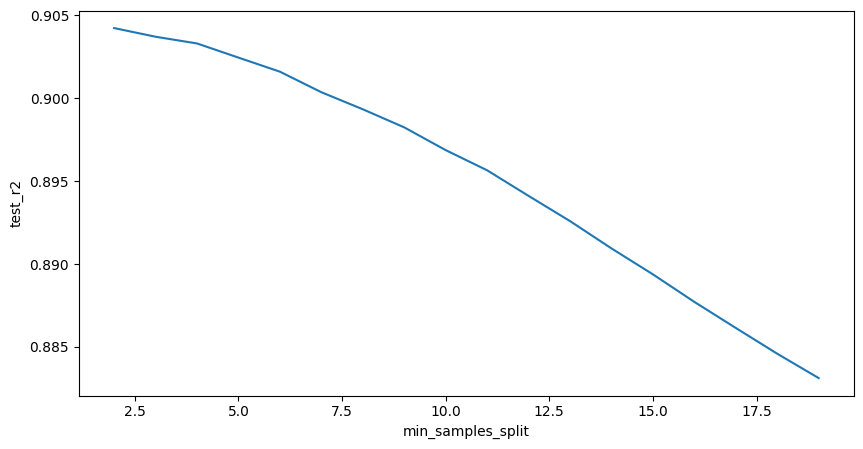

In [104]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=clf_df, x='min_samples_split', y='test_r2')

In [ ]:
'''
min_samples_split=2 gives best result
'''

In [105]:
#variant: min_samples_leaf

clf_list = list()

for i in range(1, 20):
    clf = RandomForestRegressor(n_estimators=300, max_depth=20, criterion='poisson', min_samples_leaf=i, n_jobs=-1, random_state=71)
    clf.fit(X_selected_train, y_train)
    train_r2 = r2_score(clf.predict(X_selected_train), y_train)
    test_r2 = r2_score(clf.predict(X_selected_test), y_test)
    print(i, train_r2, test_r2)
    clf_list.append({'min_samples_leaf':i, 'train_r2':train_r2, 'test_r2':test_r2})

clf_df = pd.DataFrame(clf_list)
clf_df

1 0.9881261254674518 0.9042295231498232
2 0.9787618829076169 0.9034013149612783
3 0.9673555585859406 0.9005945768277638
4 0.9570794006915064 0.8968799604605889
5 0.9481861846724644 0.8927005467512973
6 0.9402927224434243 0.8883659387330972
7 0.9331722108538929 0.8841548219903417
8 0.9267134581445176 0.8798385868983518
9 0.9207461906537546 0.8757296927818393
10 0.9153764853136329 0.8719618289177733
11 0.9104660754277557 0.8685325993811946
12 0.9058415421064907 0.864959236050115
13 0.9013482593291342 0.8617175017235434
14 0.8968820728773664 0.8583423606973302
15 0.8922880130692616 0.8550579594538219
16 0.8880089321131612 0.8515981665239514
17 0.8839804009651764 0.8485590719614813
18 0.8802237724445383 0.8457337670318436
19 0.8766954363487369 0.8428438606412493


,min_samples_leaf,train_r2,test_r2
0,1,0.988126,0.904230
1,2,0.978762,0.903401
2,3,0.967356,0.900595
3,4,0.957079,0.896880
4,5,0.948186,0.892701
5,6,0.940293,0.888366
6,7,0.933172,0.884155
7,8,0.926713,0.879839
8,9,0.920746,0.875730
9,10,0.915376,0.871962


<Axes: xlabel='min_samples_leaf', ylabel='test_r2'>

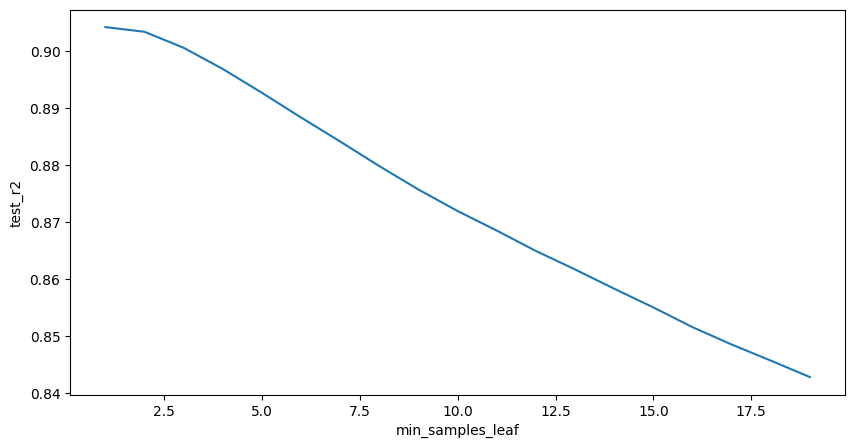

In [106]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=clf_df, x='min_samples_leaf', y='test_r2')

In [ ]:
'''
min_samples_leaf=1 gives best result
'''

In [107]:
#variant: ccp_alpha

clf_list = list()

for i in range(0, 20):
    clf = RandomForestRegressor(n_estimators=300, max_depth=20, criterion='poisson', ccp_alpha=i/1000, n_jobs=-1, random_state=71)
    clf.fit(X_selected_train, y_train)
    train_r2 = r2_score(clf.predict(X_selected_train), y_train)
    test_r2 = r2_score(clf.predict(X_selected_test), y_test)
    print(i, train_r2, test_r2)
    clf_list.append({'ccp_alpha':i/1000, 'train_r2':train_r2, 'test_r2':test_r2})

clf_df = pd.DataFrame(clf_list)
clf_df

0 0.9881261254674518 0.9042295231498232
1 0.9864703640893837 0.9040060854140892
2 0.9844144542912882 0.9036820063956968
3 0.9822344484685743 0.9031227753250839
4 0.9799763491003642 0.9025250786396837
5 0.9776982306231997 0.9020263100643519
6 0.9754300280776474 0.9013041288897371
7 0.9732000719142412 0.9004505825528647
8 0.971038191239527 0.899608070937558
9 0.9688698811852544 0.8987287474130841
10 0.96674384794819 0.897753835097595
11 0.9646891569420243 0.8967836706936002
12 0.9626478433382317 0.8958040788898504
13 0.9606935742069322 0.8949482406425684
14 0.9587796913863689 0.8940094702262473
15 0.9568744503971389 0.8930655175777148
16 0.9550500002777537 0.8922215866978664
17 0.9532902786742288 0.8913163402762809
18 0.9515677197563172 0.8903821866103169
19 0.949872709912779 0.8893135267885337


,ccp_alpha,train_r2,test_r2
0,0.000,0.988126,0.904230
1,0.001,0.986470,0.904006
2,0.002,0.984414,0.903682
3,0.003,0.982234,0.903123
4,0.004,0.979976,0.902525
5,0.005,0.977698,0.902026
6,0.006,0.975430,0.901304
7,0.007,0.973200,0.900451
8,0.008,0.971038,0.899608
9,0.009,0.968870,0.898729


<Axes: xlabel='ccp_alpha', ylabel='test_r2'>

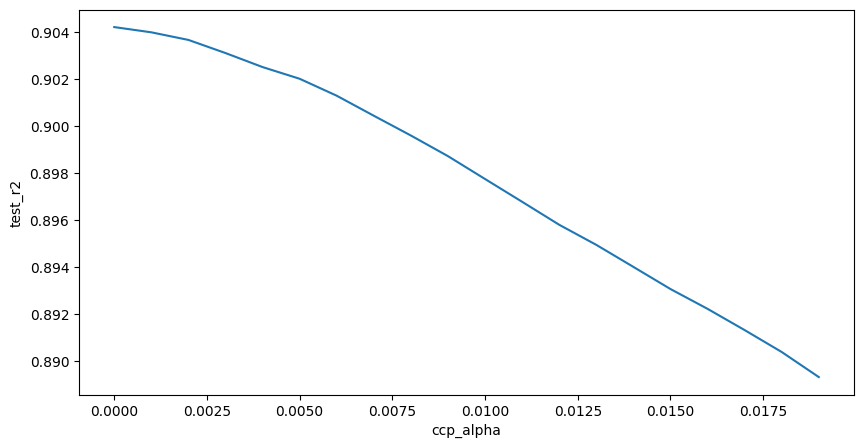

In [108]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=clf_df, x='ccp_alpha', y='test_r2')

In [ ]:
'''
ccp_alpha=0 gives best result
'''

In [109]:
#final model
#features_dropped = 10, n_estimators=300, max_depth=20, criterion=poisson

clf = RandomForestRegressor(n_estimators=300, max_depth=20, criterion='poisson', n_jobs=-1, random_state=71)
clf.fit(X_selected_train, y_train)
print('train r2 score: ', r2_score(clf.predict(X_selected_train), y_train))
print('test r2 score: ', r2_score(clf.predict(X_selected_test), y_test))
print('total r2 score: ', r2_score(clf.predict(X.drop(columns=features_list[:10])), y))

train r2 score:  0.9881261254674518
test r2 score:  0.9042295231498232
total r2 score:  0.9726161698173849
